In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Путь к файлу с данными
data_path = '.../data/metrics_collector.tsv'

In [17]:
# Проверка существования файла
if not os.path.exists(data_path):
    raise FileNotFoundError(f"File not found: {data_path}")

In [18]:
# Загрузка данных без заголовков
data = pd.read_csv(data_path, sep='\t', header=None)

/var/folders/87/d35_l8056xbbpvj6g4knhvsm0000gn/T/ipykernel_18049/2432065162.py:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(data_path, sep='\t', header=None)


In [19]:
# Определение правильных имен столбцов
columns = [
    'account_id', 'name', 'point', 'call_count', 'total_call_time', 'total_exclusive_time', 
    'min_call_time', 'max_call_time', 'sum_of_squares', 'instances', 'language', 'app_name', 
    'app_id', 'scope', 'host', 'display_host', 'pid', 'agent_version', 'labels'
]
data.columns = columns

In [20]:
# Проверка столбцов в загруженных данных
print("Columns in the dataset:", data.columns)

Columns in the dataset: Index(['account_id', 'name', 'point', 'call_count', 'total_call_time',
       'total_exclusive_time', 'min_call_time', 'max_call_time',
       'sum_of_squares', 'instances', 'language', 'app_name', 'app_id',
       'scope', 'host', 'display_host', 'pid', 'agent_version', 'labels'],
      dtype='object')


In [21]:
# Предварительная обработка данных
timestamp_column = 'point'
if timestamp_column not in data.columns:
    raise KeyError(f"Column '{timestamp_column}' not found in the dataset")

In [22]:
data[timestamp_column] = pd.to_datetime(data[timestamp_column])
data = data.sort_values(by=timestamp_column)
data = data.fillna(0)  # Заполнение пропущенных значений нулями

In [23]:
# Вычисление ключевых метрик
data['web_response'] = data['total_call_time'] / data['call_count']
data['throughput'] = data['call_count']
s = data['call_count']
t = data['total_call_time']
f = data['total_exclusive_time']
data['apdex'] = (s + t / 2) / (s + t + f)
data['error_rate'] = data.apply(lambda row: row['call_count'] if row['name'] == 'Errors/allWeb' else 0, axis=1) / data['call_count']

In [25]:
# Сохранение обработанных данных
processed_data_path = '.../data/processed_data.tsv'
data.to_csv(processed_data_path, sep='\t', index=False)

/Library/Python/3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


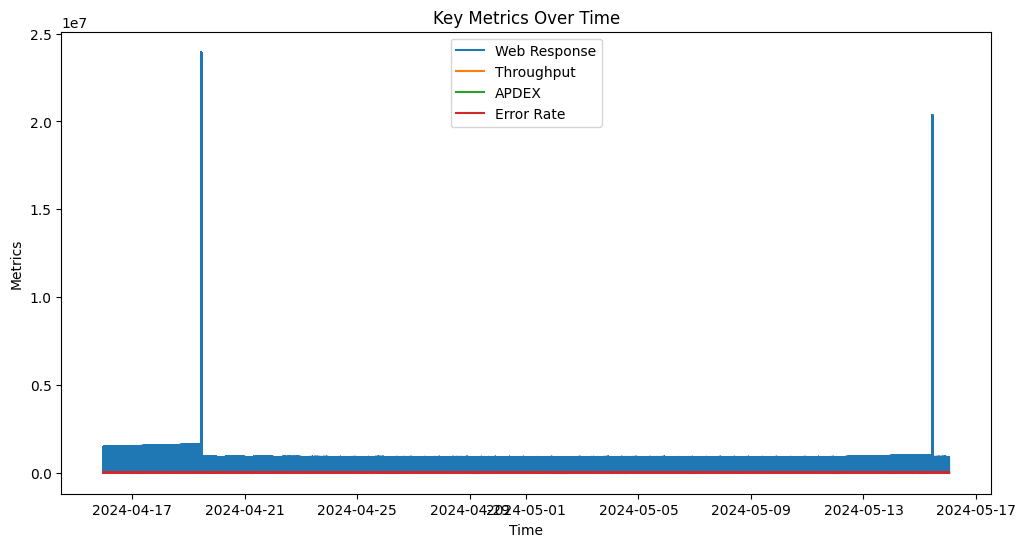

In [26]:
# Визуализация временных рядов
plt.figure(figsize=(12, 6))
plt.plot(data[timestamp_column], data['web_response'], label='Web Response')
plt.plot(data[timestamp_column], data['throughput'], label='Throughput')
plt.plot(data[timestamp_column], data['apdex'], label='APDEX')
plt.plot(data[timestamp_column], data['error_rate'], label='Error Rate')
plt.title('Key Metrics Over Time')
plt.xlabel('Time')
plt.ylabel('Metrics')
plt.legend()
plt.show()